# BootCamp 2019 - Week 1

## Dynamic Programming - Homework 1

Author: Martina Fraschini

### Question 1 - Asset market equilibrium

In this economy each agent $h$ maximizes his own utility function:
$$ \max_{c^h_0, c^h_s, \theta^h_1, \theta^h_2} u(c^h_0)+\frac{1}{S}\sum^S_{s=1} u(c^h_s) $$
subject to:
$$ c^h_0=e^h_0-q_1\theta^h_1-q_2\theta^h_2 $$
$$$$
$$ c^h_s=e^h_s+\theta^h_1A^1_s+\theta^h_2A^2_s $$

where $u(c)=\frac{c^{1-\gamma}}{1-\gamma}$ is the von Neumann-Morgenstern utility, $S$ are the states of the world in the second period, $c^h_0$ is the consumption of agent $h$ in the first period, $c^h_s$ are the consumptions of agent $h$ in the second period in each state, $e^h_0$ is the initial endowment, $e^h_s$ are the final endowments, $\theta^h_1$ and $\theta^h_2$ are the amount of asset holding, $q_1$ and $q_2$ the respective prices, $A^1_s$ and $A^2_s$ the respective payoffs in each state of the world.

If we substitute the budget constraints in the value function, we obtain:
$$ \max_{\theta^h_1,\theta^h_2} u(e^h_0-q_1\theta^h_1-q_2\theta^h_2)+\frac{1}{S}\sum^S_{s=1} u(e^h_s+\theta^h_1A^1_s+\theta^h_2A^2_s) $$

The 4 equations for the FOCs are given by:
$$ q_iu'(e^h_0-q_1\theta^h_1-q_2\theta^h_2)=\frac{1}{S}\sum^S_{s=1} A^i_s u'(e^h_s+\theta^h_1A^1_s+\theta^h_2A^2_s) $$
that can be rewritten as:
$$ q_i(e^h_0-q_1\theta^h_1-q_2\theta^h_2)^{-\gamma}=\frac{1}{S}\sum^S_{s=1} A^i_s (e^h_s+\theta^h_1A^1_s+\theta^h_2A^2_s)^{-\gamma} $$

The market clearing conditions are:
$$ \theta^1_1+\theta^2_1=0 $$
$$$$
$$ \theta^1_2+\theta^2_2=0 $$

We'll solve the system of 6 equations (FOCs and market clearing) for the following 6 variables: $\theta^1_1, \theta^1_2, \theta^2_1, \theta^2_2, q_1, q_2$.

In [28]:
# import package
import numpy as np
from scipy.optimize import fsolve

# define system of equations
def system(x):
    a1 = np.array([1,1,1,1])
    a2 = np.array([1,1,1.5,1.5])
    e1 = np.array([1,2,1,2])
    e2 = np.array([3,1,3,1])
    foc1 = x[4]*(1-x[4]*x[0]-x[5]*x[1])**(-gamma) - .25*sum(a1*(e1+x[0]*a1+x[1]*a2)**(-gamma)) 
    foc2 = x[4]*(1-x[4]*x[2]-x[5]*x[3])**(-gamma) - .25*sum(a1*(e2+x[2]*a1+x[3]*a2)**(-gamma))
    foc3 = x[5]*(1-x[4]*x[0]-x[5]*x[1])**(-gamma) - .25*sum(a2*(e1+x[0]*a1+x[1]*a2)**(-gamma))
    foc4 = x[5]*(1-x[4]*x[2]-x[5]*x[3])**(-gamma) - .25*sum(a2*(e2+x[2]*a1+x[3]*a2)**(-gamma))
    mk1 = x[0] + x[2]
    mk2 = x[1] + x[3]
    return (foc1, foc2, foc3, foc4, mk1, mk2)

valuesgamma = np.array([2,4,8,166])
print('{:>12}{:>12}{:>12}{:>12}{:>12}{:>12}{:>12}'.format('gamma','theta^1_1','theta^1_2','theta^2_1','theta^2_2','q1','q2'))
print('-'*85)
for g in valuesgamma:
    gamma = g
    sol = fsolve(system, [.5,.5,.5,.5,.5,.5])
    print('{:>12}{:>12}{:>12}{:>12}{:>12}{:>12}{:>12}'.format(g,round(sol[0],5),round(sol[1],5),round(sol[2],5),round(sol[3],5),round(sol[4],5),round(sol[5],5)))

       gamma   theta^1_1   theta^1_2   theta^2_1   theta^2_2          q1          q2
-------------------------------------------------------------------------------------
           2     0.01954        -0.0    -0.01954         0.0     0.58978     0.73722
           4     0.00403         0.0    -0.00403        -0.0     0.51866     0.64833
           8     0.00016         0.0    -0.00016        -0.0     0.50101     0.62627
         166         0.0        -0.0        -0.0         0.0         0.5       0.625


### Question 2 - Tic Tac Toe

### Question 3 - Ramsey I

Converged after iteration 172


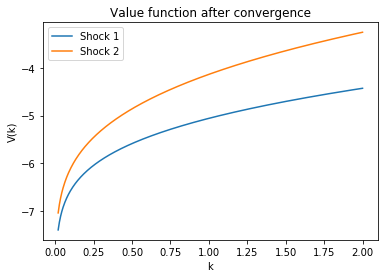

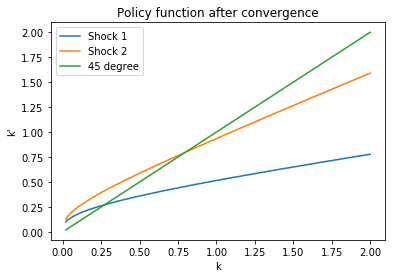

In [33]:
# import package
import numpy as np
from matplotlib import pyplot as plt

# define grid of values for capital k and for states s
N = 500
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 states
f = np.zeros_like(k_grid)
f[0,:] = 0.9*k_grid[0,:]**0.3 + 0.3*k_grid[0,:]
f[1,:] = 1.1*k_grid[1,:]**0.3 + 0.9*k_grid[1,:]

# initialize value function
V_init = np.zeros_like(k_grid)

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define utility function
def u(c):
    return np.log(c)

def vf_update(V_old):
    V_new = np.zeros_like(V_old)
    policy = np.zeros_like(V_old)
    
    for i in range(N):
        for s in range(2):
            V_action = np.zeros_like(k_grid[0,:])
            c = f[s, i] - k_grid[0,:]
            V_action[c <= 0] = -999999
            V_action[c > 0] = u(c[c > 0]) + beta*(0.5*V_old[0, c > 0] + 0.5*V_old[1, c > 0])
            V_new[s,i] = max(V_action[:])
            policy[s,i] = k_grid[0,np.argmax(V_action[:])]
    
    return V_new, policy

# iterate until convergence
V = V_init.copy()

for iteration in range(max_iterations):
    V_new, policy_k = vf_update(V)
    difference = np.max(abs(V_new - V))
    
    V = V_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], V[1,:], label="Shock 2")
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.legend()
        plt.title('Value function after convergence')
        plt.show()
        
        plt.figure()
        plt.plot(k_grid[0,:], policy_k[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], policy_k[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        break


### Question 4 - Stochastic Ramsey model, time iteration collocation

#### Part a - discrete shocks

In the Ramsey model, we define the Bellman equation as:

$$ V(k,s)=\max_{k'} u(f(s,k)-k')+\beta E_{s,k}[V(s',k')] $$

FOC:

$$ -u'(f(s,k)-k')+\beta E_{s,k}[f_k(s',k')u'(f(s',k')-k'')]=0 $$

Euler equation:

$$ u'(f(s,k)-k')=\beta E_{s,k}[f_k(s',k')u'(f(s',k')-k'')] $$

Converged after iteration 26


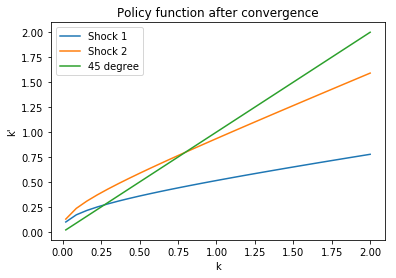

In [109]:
# import package
import numpy as np
from matplotlib import pyplot as plt

# define grid of values for capital k and for states s
N = 30
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 states
kp_grid = np.copy(k_grid)

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,s):
    if s == 0:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k
    
def f1(k,s):
    if s == 0:
        return 0.3*0.9*k**(0.3-1) + 0.3
    else:
        return 0.3*1.1*k**(0.3-1) + 0.9


# define utility function and its derivative
def u(c):
    return np.log(c)

def u1(c):
    return 1. / c

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old):
    expectation1 = f1(x,0) * u1(f(x,0)-np.interp(x,k_grid[0,:],k_old[0,:]))
    expectation2 = f1(x,1) * u1(f(x,1)-np.interp(x,k_grid[1,:],k_old[1,:]))
    return u1(f(k,s)-x) - beta*0.5*(expectation1 + expectation2)

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(2):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like((k_grid)) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], k_old[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], k_old[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break


Change $\beta$ and $u(c)$:

Converged after iteration 63


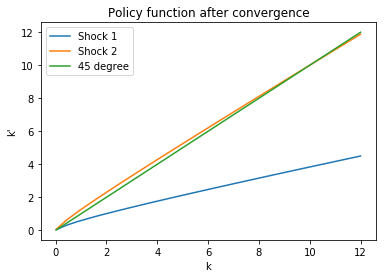

In [112]:
# import package
import numpy as np
from matplotlib import pyplot as plt

# define grid of values for capital k and for states s
N = 30
k_low = 0.02
k_high = 12
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 states
kp_grid = np.copy(k_grid)

# define parameters
beta = .999
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,s):
    if s == 0:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k
    
def f1(k,s):
    if s == 0:
        return 0.3*0.9*k**(0.3-1) + 0.3
    else:
        return 0.3*1.1*k**(0.3-1) + 0.9


# define utility function and its derivative
def u(c):
    return -c**(-4)

def u1(c):
    return 4*c**(-5)

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old):
    expectation1 = f1(x,0) * u1(f(x,0)-np.interp(x,k_grid[0,:],k_old[0,:]))
    expectation2 = f1(x,1) * u1(f(x,1)-np.interp(x,k_grid[1,:],k_old[1,:]))
    return u1(f(k,s)-x) - beta*0.5*(expectation1 + expectation2)

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(2):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like((k_grid)) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], k_old[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], k_old[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break

Approximating the policy function by a polynomial of degree 5:

Converged after iteration 27


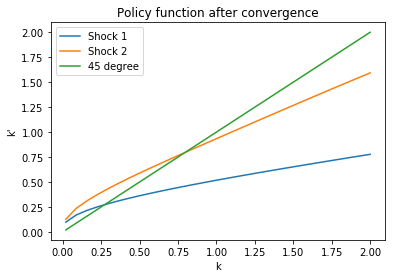

In [115]:
# import package
import numpy as np
from matplotlib import pyplot as plt

# define grid of values for capital k and for states s
N = 30
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 states
kp_grid = np.copy(k_grid)

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,s):
    if s == 0:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k
    
def f1(k,s):
    if s == 0:
        return 0.3*0.9*k**(0.3-1) + 0.3
    else:
        return 0.3*1.1*k**(0.3-1) + 0.9


# define utility function and its derivative
def u(c):
    return np.log(c)

def u1(c):
    return 1. / c

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old):
    poly5_1 = np.poly1d(np.polyfit(k_grid[0,:],k_old[0,:],5))
    poly5_2 = np.poly1d(np.polyfit(k_grid[1,:],k_old[1,:],5))
    expectation1 = f1(x,0) * u1(f(x,0)-poly5_1(x))
    expectation2 = f1(x,1) * u1(f(x,1)-poly5_2(x))
    return u1(f(k,s)-x) - beta*0.5*(expectation1 + expectation2)

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(2):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like((k_grid)) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], k_old[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], k_old[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break


Approximating the policy function by cubic splines:

Converged after iteration 26


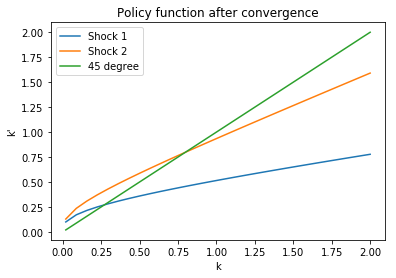

In [117]:
# import package
import numpy as np
from matplotlib import pyplot as plt
import scipy

# define grid of values for capital k and for states s
N = 30
k_low = 0.02
k_high = 2
k_grid = np.linspace(k_low, k_high, N)
k_grid = k_grid * np.ones((2,N)) # we have 2 states
kp_grid = np.copy(k_grid)

# define parameters
beta = .9
tol = 1e-8
max_iterations = 10000

# define production function and its derivative
def f(k,s):
    if s == 0:
        return 0.9*k**0.3 + 0.3*k
    else:
        return 1.1*k**0.3 + 0.9*k
    
def f1(k,s):
    if s == 0:
        return 0.3*0.9*k**(0.3-1) + 0.3
    else:
        return 0.3*1.1*k**(0.3-1) + 0.9


# define utility function and its derivative
def u(c):
    return np.log(c)

def u1(c):
    return 1. / c

# define Euler equation
def Euler_eq(x,k,s,k_grid,k_old):
    spline1 = scipy.interpolate.CubicSpline(k_grid[0,:],k_old[0,:],5)
    spline2 = scipy.interpolate.CubicSpline(k_grid[1,:],k_old[1,:],5)
    expectation1 = f1(x,0) * u1(f(x,0)-spline1(x))
    expectation2 = f1(x,1) * u1(f(x,1)-spline2(x))
    return u1(f(k,s)-x) - beta*0.5*(expectation1 + expectation2)

def k_update(k_old):
    k_new = np.zeros_like(k_old)
    
    for i in range(N):
        for s in range(2):
            x0 = k_old[s,i]
            myfun = lambda x: Euler_eq(x,k_grid[s,i],s,k_grid,k_old)
            opt = root(myfun, x0)
            k_new[s,i] = opt.x
            if not opt.success == True:
                print(opt)
            assert opt.success == True, 'solver not successfull'
    
    return k_new

# iterate until convergence
k_old = np.ones_like((k_grid)) * k_low

for iteration in range(max_iterations):
    k_new = k_update(k_old)
    difference = np.max(abs(k_new - k_old))
    
    k_old = k_new.copy()

    if difference < tol:
        print('Converged after iteration {}'.format(iteration + 1))
        plt.figure()
        plt.plot(k_grid[0,:], k_old[0,:], label="Shock 1")
        plt.plot(k_grid[1,:], k_old[1,:], label="Shock 2")
        plt.plot(k_grid[1,:], k_grid[1,:], label="45 degree")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.title('Policy function after convergence')
        plt.show()
        
        break


#### Part b - AR(1) shocks